In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars.shape

(1187, 38)

In [5]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.shape

(1186, 38)

So far we removed one row with 'RespondentID' being NaN. From looking at the columns, we will need to adjust the column names with the tag 'Unnamed'

In [6]:
# convert yes and no answers to boolean values
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

So far converting from yes/no to boolean worked. We can already see, that not everybody went through all the questions, as the question 'Have you seen any of the 6 films in the Star Wars franchise?' was answered by 1186 people and the later question 'Do you consider yourself to be a fan of the Star Wars film franchise?'was answered by 836 people

In [9]:
import numpy as np
# converting seen answer to Boolean
seen_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(seen_map)

In [10]:
# rename the columns of the movies
new_names = {
   "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
}

star_wars = star_wars.rename(columns=new_names)

In [11]:
for col in star_wars.columns[3:9]:
    print(star_wars[col].value_counts())

True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64
True     738
False    448
Name: seen_6, dtype: int64


Now we renamed the columns of the movies to the specific episodes and converted the answers to boolean values. This will make data picking and analysis a lot easier.
The same will be done in the following operations with the ranking of the 6 movies.

In [12]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [13]:
# rename the columns of the ranking
rank_names = {
   "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "rank_1",
        "Unnamed: 10": "rank_2",
        "Unnamed: 11": "rank_3",
        "Unnamed: 12": "rank_4",
        "Unnamed: 13": "rank_5",
        "Unnamed: 14": "rank_6"
}

star_wars = star_wars.rename(columns=rank_names)

In [14]:
star_wars[star_wars.columns[9:15]]

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


Now that we've cleaned up our data we can start analyzing the data. We begin with computing the most favourite of all of the star-Wars movies, by simply applying the mean to the ranking columns.

In [15]:
ranking_mean = star_wars[star_wars.columns[9:15]].mean()
ranking_std = star_wars[star_wars.columns[9:15]].std()
ranking_mean

rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64

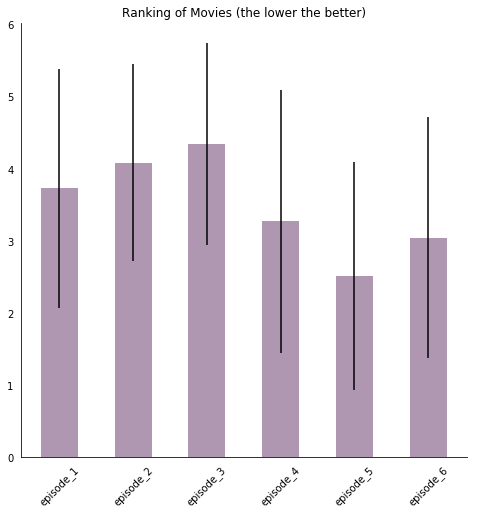

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

ind = np.arange(len(ranking_mean))

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Ranking of Movies (the lower the better)')
ax.bar(ind+0.25, ranking_mean, width=0.5, yerr=ranking_std, color='#AF97B2')
ax.set_xticklabels(('episode_1','episode_2','episode_3',
           'episode_4', 'episode_5', 'episode_6'), rotation=45)
ax.set_xticks(ind + 0.25)
ax.tick_params(bottom='off', left='off', top='off')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Computing numerical operations over ordinal scaled data is in general critical, as the computed means here won't reflect a standardized distance between the movies.

If we only state which movie has been ranked better, than we are fine with using the mean for the moment. 

As we can see from the plot above, the last three movies have been ranked better, than the first three movies. This is interesting, as the cult status of Star Wars was generated in the 1980s, it might be worth looking at the age of the respondents. Also we'll at how many people have seen each of the movies.

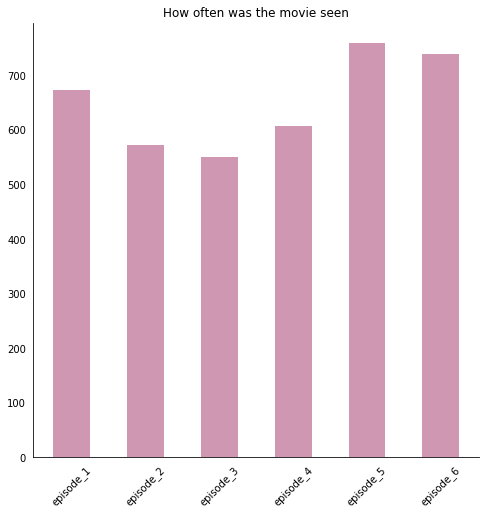

In [17]:
seen_sum = star_wars[star_wars.columns[3:9]].sum()

ind = np.arange(len(seen_sum))

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('How often was the movie seen')
ax.bar(ind + 0.25, seen_sum, width=0.5, color='#CF97B2')
ax.set_xticklabels(('episode_1','episode_2','episode_3',
           'episode_4', 'episode_5', 'episode_6'), rotation=45)
ax.set_xticks(ind + 0.25)
ax.tick_params(bottom='off', left='off', top='off')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

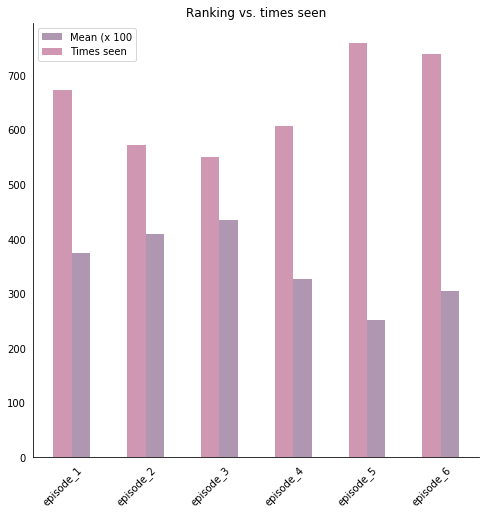

In [18]:
ind = np.arange(len(ranking_mean))

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Ranking vs. times seen')
ax.bar(ind+0.5, ranking_mean*100, width=0.25, color='#AF97B2', label='Mean (x 100')
ax.bar(ind + 0.25, seen_sum, width=0.25, color='#CF97B2', label='Times seen')
ax.set_xticklabels(('episode_1','episode_2','episode_3',
           'episode_4', 'episode_5', 'episode_6'), rotation=45)
ax.set_xticks(ind + 0.25)
ax.tick_params(bottom='off', left='off', top='off')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()

When comparing the number of times a movie has been seen, with the average rating of these movies, one can see a tendency, that the more often a movie has been watched, the better it is rated.

This is also stated by the correlation coefficient between *ranking_mean* and *seen_sum*.

Next we will look at gender differences.

In [19]:
print("Correlation between ranking and times seen: %1.2f" %np.corrcoef(ranking_mean, seen_sum)[0,1])

Correlation between ranking and times seen: -0.88


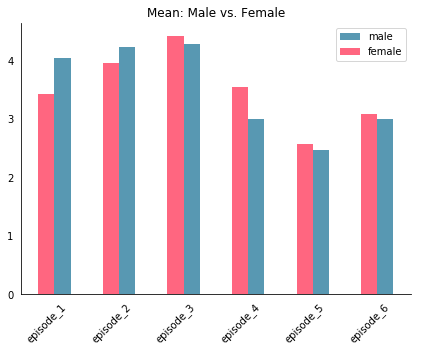

In [20]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

fig,ax = plt.subplots(figsize=(7,5))
ax.set_title('Mean: Male vs. Female')
ax.bar(ind+0.5, males[males.columns[9:15]].mean(), width=0.25, color='#5898B2', label='male')
ax.bar(ind + 0.25, females[males.columns[9:15]].mean(), width=0.25, color='#FF6680', label='female')
ax.set_xticklabels(('episode_1','episode_2','episode_3',
           'episode_4', 'episode_5', 'episode_6'), rotation=45)
ax.set_xticks(ind + 0.25)
ax.tick_params(bottom='off', left='off', top='off')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()

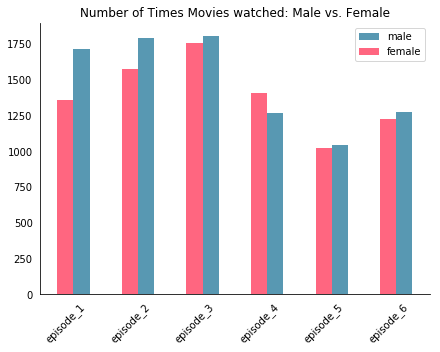

In [28]:

fig,ax = plt.subplots(figsize=(7,5))
ax.set_title('Number of Times Movies watched: Male vs. Female')
ax.bar(ind+0.5, males[males.columns[9:15]].sum(), width=0.25, color='#5898B2', label='male')
ax.bar(ind + 0.25, females[males.columns[9:15]].sum(), width=0.25, color='#FF6680', label='female')
ax.set_xticklabels(('episode_1','episode_2','episode_3',
           'episode_4', 'episode_5', 'episode_6'), rotation=45)
ax.set_xticks(ind + 0.25)
ax.tick_params(bottom='off', left='off', top='off')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()

More males looked episodes 1 to 3, but females rated these better than males. Maybe we find a more interesting difference when looking at ages or when looking at the columns realted to characters.

In [22]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'rank_1',
       'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='obje